This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models. (i.e. predict continuous var 'price' from other vars)

url: https://www.kaggle.com/harlfoxem/housesalesprediction

In [1]:
# Import libraries

from scipy.stats import norm
import numpy.random as nr

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

from sklearn.decomposition import PCA
import statsmodels.formula.api as sm


%matplotlib inline

In [2]:
# kc house sales dataset.. has no missing values

filename = 'kc_house_data.csv'
data1 = pd.read_csv(filename)

print(data1.shape)
data1.head(10)

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
# summary statistics to get a sense of distribution of column values

data1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# revisiting milestone 1 insights

Text(0.5, 1.0, 'House price versus King County grade \n with waterfront by color')

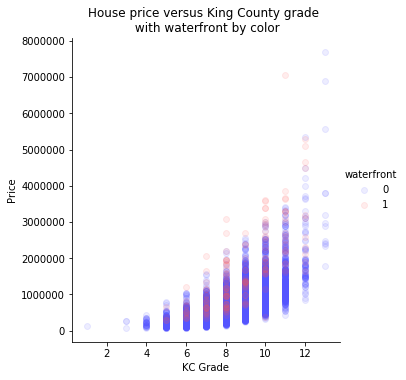

In [4]:
# does king country grade correlate with price?
# Answer: Yes, especially for higher grade properties.
# waterfront properties also tend to be more expensive per grade 

%matplotlib inline

sns.lmplot(x = 'grade', y = 'price', 
           data = data1, 
           hue = "waterfront", 
           palette="seismic", 
           scatter_kws={'alpha':0.1},
           fit_reg = False)
plt.xlabel('KC Grade')
plt.ylabel('Price')
plt.title('House price versus King County grade \n with waterfront by color')


Text(0.5, 1.0, 'Price Distribution by Zipcode')

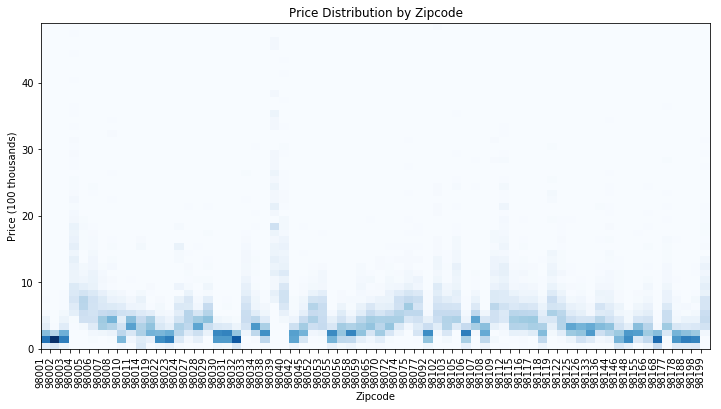

In [5]:
# Is the distribution of price the same for different zip codes?
# Answer: There are a minority of zip codes (Bellevue Area) that have much higher price distributions.

# bin price data
data1.loc[:, 'PriceBin'] = pd.cut(data1.loc[:, 'price'], bins = 77, labels = np.arange(1,78))
#data1.loc[:, 'RatioBin'].head(10)

# frequency counts of ratio bins
zip_price = pd.crosstab(data1.loc[:, 'PriceBin'], data1.loc[:, 'zipcode'])
num_prices = zip_price.apply(sum, axis = 0)
zip_price = zip_price.div(num_prices, axis = 1)
#print(data1.head())

ax = plt.figure(figsize=(12, 6)).gca() # define axis
ax.pcolor(zip_price, cmap = 'Blues')
ax.set_xticks(range(zip_price.shape[1]))
ax.set_xticklabels(zip_price.columns, rotation=90)
ax.set_xlabel('Zipcode')
ax.set_ylabel('Price (100 thousands)')
ax.set_title('Price Distribution by Zipcode')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

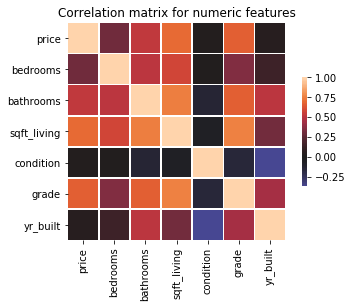

In [7]:
# which numeric variables of this KC housing dataset are correlated?
# Answers: 
# price and year built are surprisingly uncorrelated
# price and size of lot are surprisingly weakly correlated
# size of indoors and size of lots are only weakly correlated
# as expected, price and # beds, # baths, size of indoors, grade are correlated

auto_corr = data1[["price","bedrooms","bathrooms","sqft_living","condition","grade","yr_built"]].corr() 

sns.heatmap(auto_corr, vmax=1.0, center=0,
            square=True, linewidths=.25, cbar_kws={"shrink": .5})
plt.title('Correlation matrix for numeric features')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

# revisiting milestone 2 insights

In [8]:
import pandas
import numpy
import matplotlib
from matplotlib import pyplot
import seaborn
import scipy
import itertools

%matplotlib inline

Text(0.5, 1.0, 'Box plot of price by home condition')

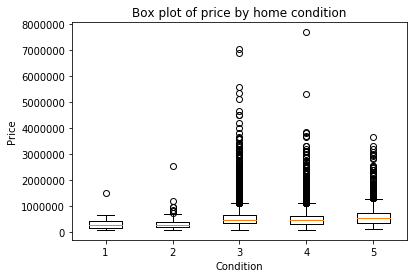

In [9]:
# plot boxplots of price by category of condition

data1['price'] = data1['price'].astype('float64')

c1 = data1['price'].loc[data1['condition'] == 1]
c2 = data1['price'].loc[data1['condition'] == 2]
c3 = data1['price'].loc[data1['condition'] == 3]
c4 = data1['price'].loc[data1['condition'] == 4]
c5 = data1['price'].loc[data1['condition'] == 5]

plt.boxplot([c1,c2,c3,c4,c5])
plt.ylabel('Price')
plt.xlabel('Condition')
plt.title('Box plot of price by home condition')

    Multiple Comparison of Means - Tukey HSD,FWER=0.05   
group1 group2   meandiff     lower        upper    reject
---------------------------------------------------------
  c1     c2    -7144.5213 -204636.9684 190347.9258 False 
  c1     c3   207580.9115  25148.1544  390013.6686  True 
  c1     c4   186768.7234  4049.9727    369487.474  True 
  c1     c5   277986.4227  94148.3717  461824.4737  True 
  c2     c3   214725.4328 138151.4626   291299.403  True 
  c2     c4   193913.2447 116660.3879  271166.1015  True 
  c2     c5    285130.944 205266.7403  364995.1477  True 
  c3     c4   -20812.1881 -36510.8531   -5113.5231  True 
  c3     c5    70405.5112  44778.6653   96032.3571  True 
  c4     c5    91217.6993  63628.4587   118806.94   True 
---------------------------------------------------------


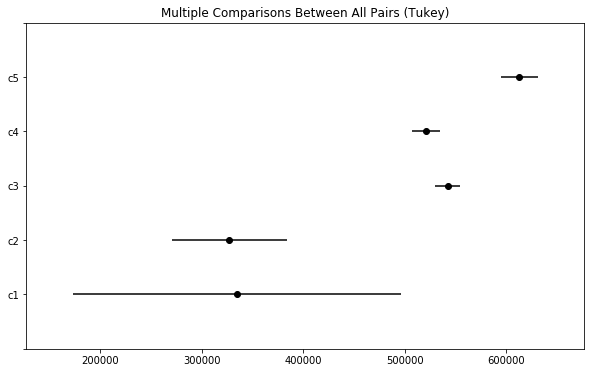

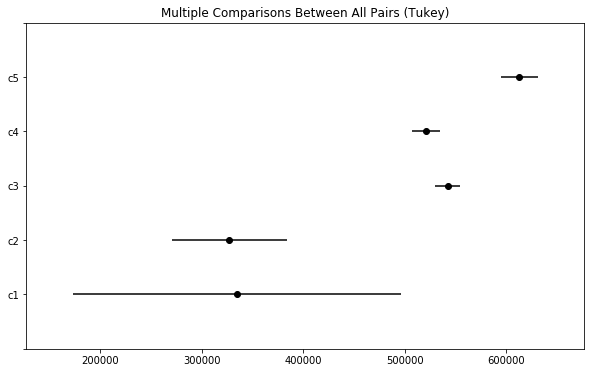

In [10]:
# Tukey's HSD (honest significant differences test) for categories of condition

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from operator import add

prices = np.concatenate((c1,c2,c3,c4,c5)).flatten()
groups = ['c1'] * len(c1) + ['c2'] * len(c2) + ['c3'] * len(c3) + ['c4'] * len(c4) + ['c5'] * len(c5)
Tukey_auto = pairwise_tukeyhsd(prices, groups) # fill in the parameters
print(Tukey_auto)
Tukey_auto.plot_simultaneous()

Text(0.5, 1.0, 'Box plot of price by home condition')

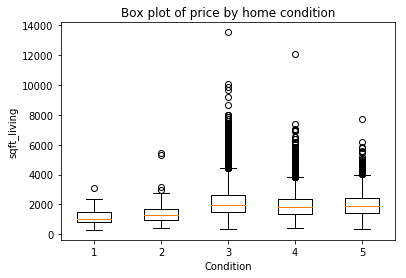

In [11]:
# plot boxplots of sqft_living by category of condition

data1['sqft_living'] = data1['sqft_living'].astype('float64')

c1 = data1['sqft_living'].loc[data1['condition'] == 1]
c2 = data1['sqft_living'].loc[data1['condition'] == 2]
c3 = data1['sqft_living'].loc[data1['condition'] == 3]
c4 = data1['sqft_living'].loc[data1['condition'] == 4]
c5 = data1['sqft_living'].loc[data1['condition'] == 5]

plt.boxplot([c1,c2,c3,c4,c5])
plt.ylabel('sqft_living')
plt.xlabel('Condition')
plt.title('Box plot of price by home condition')

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2  meandiff   lower     upper   reject
--------------------------------------------------
  c1     c2    194.0581 -298.0784  686.1947 False 
  c1     c3    933.042   478.4331  1387.651  True 
  c1     c4    734.9917  279.6701 1190.3133  True 
  c1     c5    806.9112  348.8004  1265.022  True 
  c2     c3    738.9839  548.1673  929.8006  True 
  c2     c4    540.9336  348.4252  733.442   True 
  c2     c5    612.8531  413.8374  811.8688  True 
  c3     c4   -198.0503 -237.1702 -158.9304  True 
  c3     c5   -126.1308  -189.991  -62.2706  True 
  c4     c5    71.9195    3.1692   140.6698  True 
--------------------------------------------------


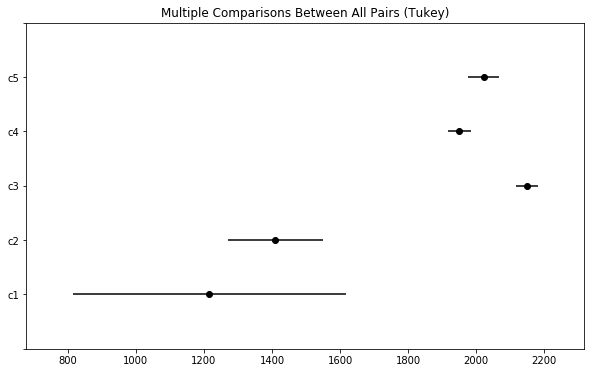

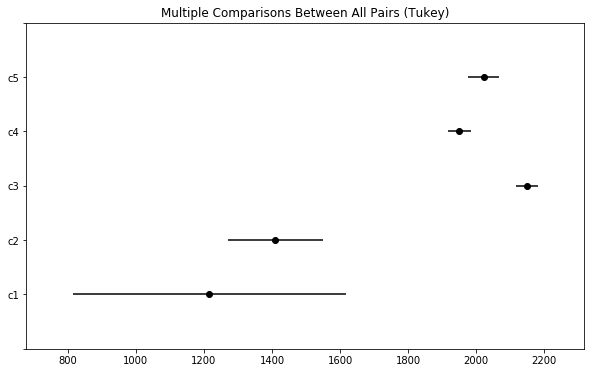

In [12]:
# Tukey's HSD (honest significant differences test) for categories of condition

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from operator import add

prices = np.concatenate((c1,c2,c3,c4,c5)).flatten()
groups = ['c1'] * len(c1) + ['c2'] * len(c2) + ['c3'] * len(c3) + ['c4'] * len(c4) + ['c5'] * len(c5)
Tukey_auto = pairwise_tukeyhsd(prices, groups) # fill in the parameters
print(Tukey_auto)
Tukey_auto.plot_simultaneous()

Text(0.5, 1.0, 'Box plot of price by home condition')

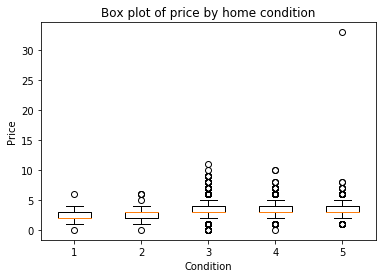

In [13]:
# plot boxplots of bedrooms by category of condition

data1['bedrooms'] = data1['bedrooms'].astype('float64')

c1 = data1['bedrooms'].loc[data1['condition'] == 1]
c2 = data1['bedrooms'].loc[data1['condition'] == 2]
c3 = data1['bedrooms'].loc[data1['condition'] == 3]
c4 = data1['bedrooms'].loc[data1['condition'] == 4]
c5 = data1['bedrooms'].loc[data1['condition'] == 5]

plt.boxplot([c1,c2,c3,c4,c5])
plt.ylabel('Price')
plt.xlabel('Condition')
plt.title('Box plot of price by home condition')

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  c1     c2    0.3647  -0.1361 0.8656 False 
  c1     c3    0.9075   0.4449 1.3702  True 
  c1     c4    0.8903   0.4269 1.3536  True 
  c1     c5    0.9937   0.5274 1.4599  True 
  c2     c3    0.5428   0.3486 0.737   True 
  c2     c4    0.5255   0.3296 0.7214  True 
  c2     c5    0.6289   0.4264 0.8315  True 
  c3     c4   -0.0172  -0.0571 0.0226 False 
  c3     c5    0.0861   0.0212 0.1511  True 
  c4     c5    0.1034   0.0334 0.1734  True 
--------------------------------------------


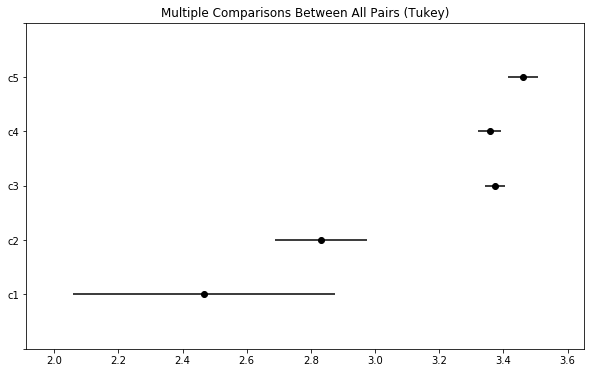

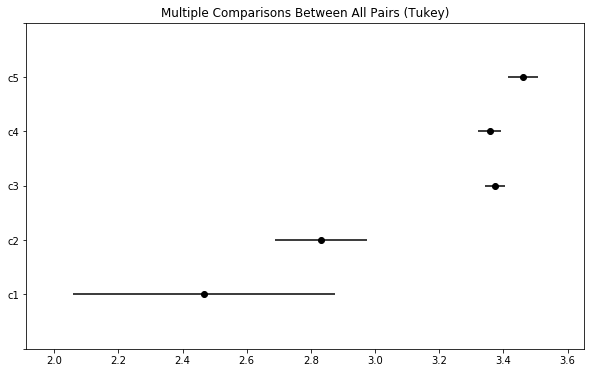

In [14]:
# Tukey's HSD (honest significant differences test) for categories of condition

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from operator import add

prices = np.concatenate((c1,c2,c3,c4,c5)).flatten()
groups = ['c1'] * len(c1) + ['c2'] * len(c2) + ['c3'] * len(c3) + ['c4'] * len(c4) + ['c5'] * len(c5)
Tukey_auto = pairwise_tukeyhsd(prices, groups) # fill in the parameters
print(Tukey_auto)
Tukey_auto.plot_simultaneous()

### Our significance testing from Milestone 2 informs us that there is colinearity between features such as sqft_living, condition and bedroom count for homes.

# improving assignment 9 naive bayesian classifier 
(removing colinear features)

In [15]:
# Import libraries

from scipy.stats import norm
import numpy.random as nr

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

from sklearn.decomposition import PCA
import statsmodels.formula.api as sm

import sklearn.naive_bayes

%matplotlib inline

In [16]:
# TARGET = binary category of price: price  > 450000 = 1   (above median)

# be sure to choose feature that are not colinear

#  FEATURES:
#  bedrooms 
#  sqft_living (bin to 1000)
#  waterfront
#  condition


In [17]:
# copy a new df with only columns of interest, bin numeric variables, engineer features

# create binary target category for price
data1['price_cat'] = data1.price.apply(lambda x: 1 if x > 450000 else 0)

# bin sqft_living to categorical
sqft_temp = data1['sqft_living'].as_matrix()
sqft_temp = np.round(sqft_temp / 1000)

# engineer feature more (ceil bedrooms and sqft_cat)
sqft_temp[sqft_temp > 5] = 6
data1['sqft_cat'] = sqft_temp.astype('int')

bed_temp = data1['bedrooms'].as_matrix()
bed_temp[bed_temp > 5] = 6
data1['bedrooms'] = bed_temp.astype('int')

# copy to new dataframe
data2 = data1[['price_cat','bedrooms','sqft_cat','waterfront','condition','grade']].copy()
data2['price_cat'] = data2['price_cat'].astype('category')

C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [18]:
data2.head()

,price_cat,bedrooms,sqft_cat,waterfront,condition,grade
0,0,3,1,0,3,7
1,1,3,3,0,3,7
2,0,2,1,0,3,6
3,1,4,2,0,5,7
4,1,3,2,0,3,8


In [19]:
# Fit the model to the data
x_input = data2[['bedrooms','sqft_cat','waterfront','condition','grade']].values.reshape(-1,5)
y_output = data2['price_cat']

# separate data into 80% training, 20% testing
train_mark = np.random.rand(len(data2)) < 0.8

x_train = x_input[train_mark]
x_test = x_input[~train_mark]
y_train = y_output[train_mark]
y_test = y_output[~train_mark]


In [20]:
import sklearn.naive_bayes

# Define the model
model = sklearn.naive_bayes.MultinomialNB(alpha=1e-7)
# Train the model with our votes dataset
model.fit(x_train, y_train)

MultinomialNB(alpha=1e-07, class_prior=None, fit_prior=True)

In [21]:
# test on test data and generate results for later evaluation

predicted_party = model.predict(x_test)
party_probabilities = model.predict_proba(x_test)

results = pd.DataFrame({
        'price': y_test,
        'predicted': pd.Categorical.from_codes(
            predicted_party, data2['price_cat'].cat.categories),
        'proba(expensive)': party_probabilities[:, 0],
        'proba(cheap)': party_probabilities[:, 1],
    })

results.head()

,price,predicted,proba(expensive),proba(cheap)
11,1,0,0.594068,0.405932
12,0,0,0.598938,0.401062
13,0,0,0.598938,0.401062
17,1,0,0.533116,0.466884
22,0,0,0.501140,0.498860


In [22]:
import sklearn.metrics
import pandas

def confusion_matrix(labels, predicted_labels, label_classes):
    return pandas.DataFrame(
        sklearn.metrics.confusion_matrix(labels, predicted_labels),
        index=[label_classes], 
        columns=label_classes)    

def performance(results):
    accuracy = sklearn.metrics.accuracy_score(
        results['price'].cat.codes, results['predicted'].cat.codes)
    precision = sklearn.metrics.precision_score(
            results['price'].cat.codes, results['predicted'].cat.codes)
    recall = sklearn.metrics.recall_score(
            results['price'].cat.codes, results['predicted'].cat.codes)

    print('Accuracy = %.3f, Precision = %.3f, Recall = %.3f' % (accuracy, precision, recall))
    
    return confusion_matrix(
        results['price'], 
        results['predicted'], 
        results.price.cat.categories)

In [23]:
### performance of original NBC model

performance(results)

Accuracy = 0.659, Precision = 0.650, Recall = 0.686


,0,1
0,1373,801
1,682,1487


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

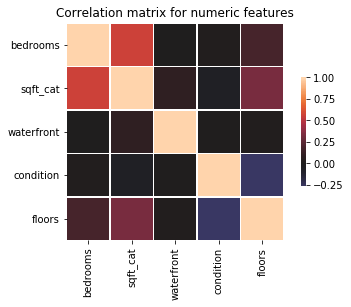

In [68]:
# which numeric variables of this KC housing dataset are correlated?
# Answers: 
# price and year built are surprisingly uncorrelated
# price and size of lot are surprisingly weakly correlated
# size of indoors and size of lots are only weakly correlated
# as expected, price and # beds, # baths, size of indoors, grade are correlated

auto_corr = data2[['price_cat','bedrooms','sqft_cat','waterfront','condition','floors']].corr() 

sns.heatmap(auto_corr, vmax=1.0, center=0,
            square=True, linewidths=.25, cbar_kws={"shrink": .5})
plt.title('Correlation matrix for numeric features')
plt.yticks(rotation='horizontal')
plt.xticks(rotation='vertical')

### given our observation that many of our features are highly colinear, we use try improving our naive Bayesian classifier by using features that are as independent as possible

In [39]:
data1 = pd.read_csv(filename)

In [91]:
# copy a new df with only columns of interest, bin numeric variables, engineer features

# create binary target category for price
data1['price_cat'] = data1.price.apply(lambda x: 1 if x > 450000 else 0)

# bin sqft_living to categorical
sqft_temp = data1['sqft_living'].as_matrix()
sqft_temp = np.round(sqft_temp / 1000)

# engineer feature more (ceil bedrooms and sqft_cat)
sqft_temp[sqft_temp > 7] = 8
data1['sqft_cat'] = sqft_temp.astype('int')

bed_temp = data1['bedrooms'].as_matrix()
bed_temp[bed_temp > 5] = 6
data1['bedrooms'] = bed_temp.astype('int')

# copy to new dataframe
data2 = data1[['price_cat','bedrooms','sqft_cat','waterfront','condition','floors']].copy()
data2['price_cat'] = data2['price_cat'].astype('category')

C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [92]:
data2.head()

,price_cat,bedrooms,sqft_cat,waterfront,condition,floors
0,0,3,1,0,3,1.0
1,1,3,3,0,3,2.0
2,0,2,1,0,3,1.0
3,1,4,2,0,5,1.0
4,1,3,2,0,3,1.0


In [113]:
# Fit the model to the data
x_input = data2[['waterfront','sqft_cat','condition','floors']].values.reshape(-1,4)
y_output = data2['price_cat']

# separate data into 80% training, 20% testing
train_mark = np.random.rand(len(data2)) < 0.8

x_train = x_input[train_mark]
x_test = x_input[~train_mark]
y_train = y_output[train_mark]
y_test = y_output[~train_mark]


In [114]:
import sklearn.naive_bayes

# Define the model
model = sklearn.naive_bayes.MultinomialNB(alpha=1e-7)
# Train the model with our votes dataset
model.fit(x_train, y_train)

MultinomialNB(alpha=1e-07, class_prior=None, fit_prior=True)

In [115]:
# test on test data and generate results for later evaluation

predicted_party = model.predict(x_test)
party_probabilities = model.predict_proba(x_test)

results = pd.DataFrame({
        'price': y_test,
        'predicted': pd.Categorical.from_codes(
            predicted_party, data2['price_cat'].cat.categories),
        'proba(expensive)': party_probabilities[:, 0],
        'proba(cheap)': party_probabilities[:, 1],
    })

results.head()

,price,predicted,proba(expensive),proba(cheap)
1,1,1,0.426923,0.573077
2,0,0,0.560734,0.439266
9,0,1,0.494547,0.505453
14,1,1,0.493716,0.506284
19,0,0,0.600293,0.399707


In [116]:
import sklearn.metrics
import pandas

def confusion_matrix(labels, predicted_labels, label_classes):
    return pandas.DataFrame(
        sklearn.metrics.confusion_matrix(labels, predicted_labels),
        index=[label_classes], 
        columns=label_classes)    

def performance(results):
    accuracy = sklearn.metrics.accuracy_score(
        results['price'].cat.codes, results['predicted'].cat.codes)
    precision = sklearn.metrics.precision_score(
            results['price'].cat.codes, results['predicted'].cat.codes)
    recall = sklearn.metrics.recall_score(
            results['price'].cat.codes, results['predicted'].cat.codes)

    print('Accuracy = %.3f, Precision = %.3f, Recall = %.3f' % (accuracy, precision, recall))
    
    return confusion_matrix(
        results['price'], 
        results['predicted'], 
        results.price.cat.categories)

In [117]:
### performance of original NBC model

performance(results)

Accuracy = 0.663, Precision = 0.660, Recall = 0.700


,0,1
0,1302,781
1,648,1515


### By noting that # of bedrooms and indoor square footage are correlated and colinear, we know that removing one of these colinear features can improve our NBC. By removing bedrooms and retaining our categorical square footage feature, we have improved the accuracy, precision and recall of our model.

# improving milestone 3 multiregression model 
(PCR to correct colinear features, using zipcode one-hot as feature)

In [118]:
# Import libraries

from scipy.stats import norm
import numpy.random as nr

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

from sklearn.decomposition import PCA
import statsmodels.formula.api as sm


%matplotlib inline

In [119]:
# copy a new df with only columns of interest, one-hot encode, zscore all numeric columns

# copy to new dataframe
data2 = data1[['price','bedrooms','sqft_living','floors','yr_built','waterfront','condition','view']].copy()

# one hot encode waterfront, condition, view
data2['view_dummy'] = data2.view.apply(lambda x: 1 if x > 0 else 0)
data2['condit_dummy'] = data2.condition.apply(lambda x: 1 if x < 3 else 0)
del data2['view']
del data2['condition']
    
# z-score numeric columns
from scipy.stats import zscore
data2.loc[:, ['bedrooms','sqft_living','floors','yr_built']] = data2.loc[:, ['bedrooms','sqft_living','floors','yr_built']].apply(zscore)

# check new dataframe
data2.describe()

,price,bedrooms,sqft_living,floors,yr_built,waterfront,view_dummy,condit_dummy
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,-1.997826e-15,3.174253e-16,-1.753125e-14,3.592925e-15,0.007542,0.098274,0.009346
std,3.671272e+05,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,0.086517,0.297692,0.096225
min,7.500000e+04,-3.935783e+00,-1.948891e+00,-9.154270e-01,-2.417383e+00,0.000000,0.000000,0.000000
25%,3.219500e+05,-4.107363e-01,-7.108948e-01,-9.154270e-01,-6.810785e-01,0.000000,0.000000,0.000000
50%,4.500000e+05,-4.107363e-01,-1.849914e-01,1.053939e-02,1.360059e-01,0.000000,0.000000,0.000000
75%,6.450000e+05,7.642793e-01,5.118578e-01,9.365058e-01,8.849999e-01,0.000000,0.000000,0.000000
max,7.700000e+06,1.939295e+00,1.247807e+01,3.714405e+00,1.497813e+00,1.000000,1.000000,1.000000


Intercept
[522646.25291527]
Coefficients: 
[[-46650.78129798 279864.89458339  39035.14794345 -75267.79967696
  618184.9032607  134486.91823879 -58980.09323905]]
RMSE
56222759314.09439
R squared adjusted
0.584022102036135


C:\Users\Christian\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Residual Histogram')

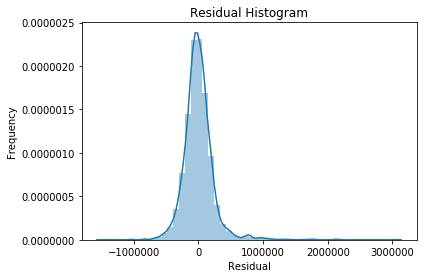

In [120]:
# linear regression with multiple independent = TV, radio, newspaper ad expenditures, dependent = sales revenue

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.linear_model import LinearRegression

# First initialize the model.
mlr = linear_model.LinearRegression()

# Fit the model to the data
x_input = data2[['bedrooms','sqft_living','floors','yr_built','waterfront','view_dummy','condit_dummy']].values.reshape(-1,7)
y_output = data2['price'].values.reshape(-1, 1)

# separate data into 80% training, 20% testing
train_mark = np.random.rand(len(data2)) < 0.8

x_train = x_input[train_mark]
x_test = x_input[~train_mark]
y_train = y_output[train_mark]
y_test = y_output[~train_mark]

# train model by fitting with training data
mlr.fit(x_train,y_train)

# Get predictions based on x test data
y_pred = mlr.predict(x_test)

# Print model parameters
# Get slope (m) and y-intercept (b)
print('Intercept')
print(mlr.intercept_)
print('Coefficients: ')
print(mlr.coef_)


# model evaluation
rmse = mean_squared_error(y_test, y_pred)
print('RMSE')
print(rmse)

r2 = r2_score(y_test, y_pred)
n_samp = len(y_test)
k = 7  # number of features

r2_adj = r2 * (n_samp-1) / (n_samp-1-k)

print('R squared adjusted')
print(r2_adj)


resids = y_test - y_pred

# Plot a histogram of the residuals
sns.distplot(resids, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

Intercept, Slopes : 
Intercept       522745.308635
bedrooms        -47263.182118
sqft_living     279272.236602
floors           39091.928012
yr_built        -76258.188225
waterfront      635736.324388
view_dummy      134019.722936
condit_dummy    -66595.346149
dtype: float64
Intercept t-value, Slope t-values: 
Intercept       306.938488
bedrooms        -23.529263
sqft_living     125.263970
floors           20.662254
yr_built        -40.418243
waterfront       33.046678
view_dummy       22.884591
condit_dummy     -3.983348
dtype: float64

Hypothesis test summary for each coefficient if they differ from zero:
Intercept        0.000000e+00
bedrooms        6.778173e-121
sqft_living      0.000000e+00
floors           6.133058e-94
yr_built         0.000000e+00
waterfront      1.120004e-233
view_dummy      1.521253e-114
condit_dummy     6.817379e-05
dtype: float64

SSE, SST, SSR, and RMSE:
SSE: 1717137765880544.0
SST: 2912916761921299.5
SSR: 1195778996040755.5
RMSE: 15662228.293757947
       

Text(0.5, 1.0, 'Residual Histogram')

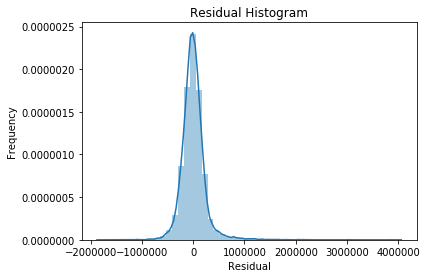

In [121]:
# We will compute a regression model for home price using our 7 specified features and then evaluate each feature

#'bedrooms','sqft_living','floors','yr_built','waterfront','view_dummy','condit_dummy'

ols_model = sm.ols(formula = 'price ~ bedrooms + sqft_living + floors + yr_built + waterfront + view_dummy + condit_dummy + 1', data=data2)

results = ols_model.fit()
n_points = data2.shape[0]
y_output = data2['price'].values.reshape(n_points, 1)

# Get slope (m) and y-intercept (b)
print('Intercept, Slopes : \n{}'.format(results.params))

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Intercept t-value, Slope t-values: \n{}'.format(results.tvalues))

# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print(results.pvalues)

print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

### given our Milestone 1 observation that certain King County zipcodes have higher real estate prices, we will use zipcode information as a feature to inform our regression model

In [122]:
data1 = pd.read_csv(filename)

In [133]:
# copy a new df with only columns of interest, one-hot encode, zscore all numeric columns

# copy to new dataframe
data2 = data1[['price','bedrooms','sqft_living','floors','yr_built','waterfront','condition','view','zipcode']].copy()

# one hot encode waterfront, condition, view
data2['view_dummy'] = data2.view.apply(lambda x: 1 if x > 0 else 0)
data2['condit_dummy'] = data2.condition.apply(lambda x: 1 if x < 3 else 0)
del data2['view']
del data2['condition']

# one hot encode zipcode
data2 = pd.get_dummies(data2, columns=['zipcode'])
    
# z-score numeric columns
from scipy.stats import zscore
data2.loc[:, ['bedrooms','sqft_living','floors','yr_built']] = data2.loc[:, ['bedrooms','sqft_living','floors','yr_built']].apply(zscore)

# check new dataframe
data2.describe()

,price,bedrooms,sqft_living,floors,yr_built,waterfront,view_dummy,condit_dummy,zipcode_98001,zipcode_98002,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,-1.254167e-15,3.174253e-16,-1.753125e-14,3.592925e-15,0.007542,0.098274,0.009346,0.016749,0.009207,...,0.013325,0.002637,0.020636,0.011752,0.012446,0.011798,0.012122,0.006293,0.012955,0.014667
std,3.671272e+05,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,0.086517,0.297692,0.096225,0.128333,0.095515,...,0.114666,0.051288,0.142165,0.107771,0.110869,0.107981,0.109435,0.079077,0.113084,0.120219
min,7.500000e+04,-3.624404e+00,-1.948891e+00,-9.154270e-01,-2.417383e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.219500e+05,-3.987371e-01,-7.108948e-01,-9.154270e-01,-6.810785e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,-3.987371e-01,-1.849914e-01,1.053939e-02,1.360059e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,6.764851e-01,5.118578e-01,9.365058e-01,8.849999e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7.700000e+06,3.185793e+01,1.247807e+01,3.714405e+00,1.497813e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Intercept
[1.86975369e+16]
Coefficients: 
[[-3.24570154e+04  2.34465081e+05  8.43818357e+02 -1.17660371e+04
   7.77786438e+05  1.18861005e+05 -2.23846572e+04 -1.86975369e+16
  -1.86975369e+16 -1.86975369e+16 -1.86975369e+16 -1.86975369e+16
  -1.86975369e+16 -1.86975369e+16 -1.86975369e+16 -1.86975369e+16
  -1.86975369e+16 -1.86975369e+16 -1.86975369e+16 -1.86975369e+16
  -1.86975369e+16 -1.86975369e+16 -1.86975369e+16 -1.86975369e+16
  -1.86975369e+16 -1.86975369e+16 -1.86975369e+16 -1.86975369e+16
  -1.86975369e+16 -1.86975369e+16 -1.86975369e+16 -1.86975369e+16
  -1.86975369e+16 -1.86975369e+16 -1.86975369e+16 -1.86975369e+16
  -1.86975369e+16 -1.86975369e+16 -1.86975369e+16 -1.86975369e+16
  -1.86975369e+16 -1.86975369e+16 -1.86975369e+16 -1.86975369e+16
  -1.86975369e+16 -1.86975369e+16 -1.86975369e+16 -1.86975369e+16
  -1.86975369e+16 -1.86975369e+16 -1.86975369e+16 -1.86975369e+16
  -1.86975369e+16 -1.86975369e+16 -1.86975369e+16 -1.86975369e+16
  -1.86975369e+16 -1.86975369e+16 

C:\Users\Christian\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Residual Histogram')

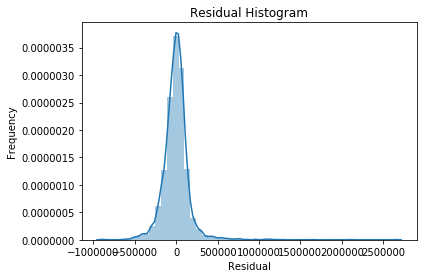

In [134]:
# linear regression with multiple independent = TV, radio, newspaper ad expenditures, dependent = sales revenue

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.linear_model import LinearRegression

# First initialize the model.
mlr = linear_model.LinearRegression()

# Fit the model to the data
x_input = data2.loc[:, data2.columns != 'price'].values.reshape(-1,77)
y_output = data2['price'].values.reshape(-1, 1)

# separate data into 80% training, 20% testing
train_mark = np.random.rand(len(data2)) < 0.8

x_train = x_input[train_mark]
x_test = x_input[~train_mark]
y_train = y_output[train_mark]
y_test = y_output[~train_mark]

# train model by fitting with training data
mlr.fit(x_train,y_train)

# Get predictions based on x test data
y_pred = mlr.predict(x_test)

# Print model parameters
# Get slope (m) and y-intercept (b)
print('Intercept')
print(mlr.intercept_)
print('Coefficients: ')
print(mlr.coef_)


# model evaluation
rmse = mean_squared_error(y_test, y_pred)
print('RMSE')
print(rmse)

r2 = r2_score(y_test, y_pred)
n_samp = len(y_test)
k = 7  # number of features

r2_adj = r2 * (n_samp-1) / (n_samp-1-k)

print('R squared adjusted')
print(r2_adj)


resids = y_test - y_pred

# Plot a histogram of the residuals
sns.distplot(resids, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

### Adding one-hot encoding of zipcode dramatically improves our regression model. Our adjusted R squared value is now 0.79, up from the previous R squared value of 0.58 without any geographical information. The distribution of our residual plot is again Gaussian, however the standard deviation of residuals approximately half of the previous value. Clearly, zipcode information is highly informative in determining real estate price.

### given our Milestone 1 and 2 observations that there is considerable colinearity among our features (such as between sqft_living and bedrooms) we will use PCR to generate our price regression model to insure only orthogonal features are used

In [135]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns

In [146]:
data1 = pd.read_csv(filename)

In [147]:
# copy a new df with only columns of interest, one-hot encode, zscore all numeric columns

# copy to new dataframe
data2 = data1[['price','bedrooms','sqft_living','floors','yr_built','waterfront','condition','view']].copy()

# one hot encode waterfront, condition, view
data2['view_dummy'] = data2.view.apply(lambda x: 1 if x > 0 else 0)
data2['condit_dummy'] = data2.condition.apply(lambda x: 1 if x < 3 else 0)
del data2['view']
del data2['condition']
    
# z-score numeric columns
from scipy.stats import zscore
data2.loc[:, ['bedrooms','sqft_living','floors','yr_built']] = data2.loc[:, ['bedrooms','sqft_living','floors','yr_built']].apply(zscore)

# check new dataframe
data2.describe()

,price,bedrooms,sqft_living,floors,yr_built,waterfront,view_dummy,condit_dummy
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,-1.254167e-15,3.174253e-16,-1.753125e-14,3.592925e-15,0.007542,0.098274,0.009346
std,3.671272e+05,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,0.086517,0.297692,0.096225
min,7.500000e+04,-3.624404e+00,-1.948891e+00,-9.154270e-01,-2.417383e+00,0.000000,0.000000,0.000000
25%,3.219500e+05,-3.987371e-01,-7.108948e-01,-9.154270e-01,-6.810785e-01,0.000000,0.000000,0.000000
50%,4.500000e+05,-3.987371e-01,-1.849914e-01,1.053939e-02,1.360059e-01,0.000000,0.000000,0.000000
75%,6.450000e+05,6.764851e-01,5.118578e-01,9.365058e-01,8.849999e-01,0.000000,0.000000,0.000000
max,7.700000e+06,3.185793e+01,1.247807e+01,3.714405e+00,1.497813e+00,1.000000,1.000000,1.000000


In [149]:
# Calculate all the Principal components
X = data2.as_matrix(columns=['bedrooms','sqft_living','floors','yr_built','waterfront','condit_dummy','view_dummy'])
y = data2['price'].as_matrix()
pca = PCA()
pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(data = pca_result, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7'])

# Here is our data projected onto the four principal components.
print(pca_df.head())
print(pca_df.shape)

pca_df['price'] = data2['price']

        pc1       pc2       pc3       pc4       pc5       pc6       pc7
0 -1.448629  0.136733 -0.275296  0.264822 -0.017454 -0.017979  0.004630
1  0.253727 -0.153174  1.194331 -0.479754 -0.223155 -0.012631 -0.009114
2 -2.553940 -0.280214  0.327130 -0.130911 -0.051930 -0.027228 -0.000906
3 -0.306784  0.907792 -0.569961  0.342213 -0.062988 -0.010253  0.006409
4 -0.627684 -0.248443 -1.015286 -0.071376 -0.034560 -0.010151  0.003963
(21613, 7)


C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\Christian\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     4419.
Date:                Tue, 15 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:03:35   Log-Likelihood:            -2.9800e+05
No. Observations:               21613   AIC:                         5.960e+05
Df Residuals:                   21605   BIC:                         5.961e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.401e+05   1601.664    337.204      0.0

C:\Users\Christian\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Residual Histogram')

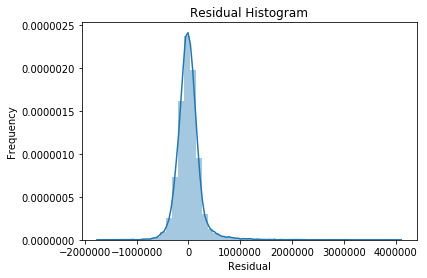

In [150]:
pcr_model = sm.ols(formula = 'price ~ pc1 + pc2 + pc3 + pc4 + pc5 + pc6 + pc7', data=pca_df)

results = pcr_model.fit()
n_points = pca_df.shape[0]
y_output = pca_df['price'].values.reshape(n_points, 1)

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')

### Interestingly, using PCR to generate our regression model for home price does not improve the model beyond our previous straightforward multivariate regression. In both cases, our R squared value is 0.589. This is likely due to our regression model fundamentally being a linear model while PCA is a linear transform of our features. This means that the features are equally as informative for our model before and after applying PCA.

## In conclusion, we have tried multiple different adaptations to our NBC and linear regression models. We have drawn upon previous observations generated in earlier milestones in the course and have used the conceptual knowledge we have gained in the course to try and improve our models. We find that our NB classifier performs better when we use independent non colinear features. We find that PCR does not improve how informative our features are for generating our linear regression model. However, using prior data visualization on zipcodes and real estate prices, we were able to include a new highly informative feature by one hot encoding zipcode information to improve our linear regression model substantially.